# PCA 主成分分析法
## principal component analysis
主要用于数据降维
![pca01](img/pca01.png)

## 当我们需要降维时
如下的2个特征:
![map1](img/map1.png)

需要降维时:
![map2](img/map2.png)


可能右边是更好地方案 因为<font color="red">点之间距离更大 所以点的区分度更大 并且保持了原来的数据的区分距离</font>

但是这个并不是最好的方案

### 下面这个呢
![map3](img/map3.png)
![map4](img/map4.png)

### 问题就变为了: 如何找到让样本间距更大的轴
#### 使用方差Variance

$$
Var(x) = \frac{1}{m}\sum_{i=0}^{m}(x_i - x_{avg})^2
$$

#### 让方差最小 Steps
#### 让样本均值归0 demean
![avg1](img/var1.png)
#### 找一个方向 w1, w2 让映射后的方差最大
![avg2](img/var2.png)
由于我们进行了demean:
![avg3](img/var3.png)
![avg4](img/var4.png)

## PCA VS 线性回归
![pcaVsLinReg](img/pcaVsLinReg.png)
![pcaVsLinReg2](img/pcaVsLinReg2.png)

## 使用梯度上升法求w 使投影后方差最大
![gd1.png](img/gd1.png)
![mat1.png](img/mat1.png)
实际上化简后:
$$
n*1梯度=\frac{2}{m} (Xw)^\mathrm TX
也就=\frac{2}{m} X^\mathrm T(Xw)
其中X是m*n, w是n*1
$$
<font color="red">这里跟线性回归的很像</font>
![linReg1.png](img/linReg1.png)


# 使用梯度上升求解最大值

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2 features, 100 examples
np.random.seed = 666
X = np.empty((100,2))

In [3]:
# random value from 0 - 100
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0,10.,size=100)

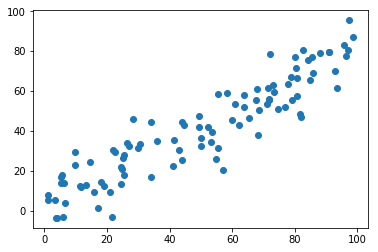

In [4]:
plt.scatter(X[:, 0], X[:, 1])

## demean

In [5]:
def demean(X):
    return X - np.mean(X, axis=0)

In [6]:
# demean example
testX = np.arange(0, 10).reshape((5, -1))
print("testX\n", testX)
m = np.mean(testX, axis=0)
print("mean\n", m)
print("testX-m\n", testX-m)

testX
 [[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
mean
 [4. 5.]
testX-m
 [[-4. -4.]
 [-2. -2.]
 [ 0.  0.]
 [ 2.  2.]
 [ 4.  4.]]


In [7]:
X_mean = demean(X)

In [8]:
def f(w, X):
    return np.sum((X.dot(w) ** 2))/len(X)

In [9]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. /len(X)

In [10]:
def df_debug(w, X, epsilon = 0.0001):
    # PCA 中w是一个方向向量 所以w 本身比较小 长度为1 所以epsilon 较小
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_2 = w.copy()
        w_1[i] += epsilon
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) -f(w_2, X))/(2*epsilon)
    return res

In [11]:
# 因为我们这里w是一个单位向量 所以需要除以w的长度
# Frobenius 范数，简称F-范数，是一种矩阵范数矩阵A的Frobenius范数定义为矩阵A各项元素的绝对值平方的总和
def direction(w):
    return w/np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    cur_iter = 0
    w = direction(initial_w)
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) ## 注意0: 每次都必须是单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        
        cur_iter +=1
    return w
# 注意1: 初始化向量不能是0向量 因为f 有x*w

In [12]:
initial_w = np.random.random(X.shape[1])
initial_w

array([0.32211975, 0.07548794])

In [13]:
eta = 0.001

In [14]:
## 注意2: 在线性回归中需要标准化 这里不需要了
## PCA 本身就是要求解一个方向 让映射后的方向上的方差最大. 如果表转化为 方差就被改为1了
## 这里实际上demean 已经将均值变为0了 但是标准差没变

In [15]:
gradient_ascent(df_debug, X_mean, initial_w, eta)

array([0.77488641, 0.63210051])

In [16]:
gradient_ascent(df_math, X_mean, initial_w, eta)

array([0.77488641, 0.63210051])

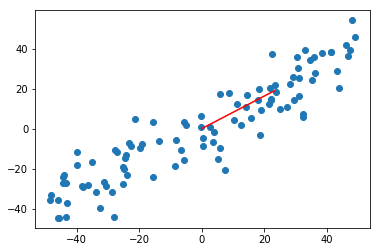

In [18]:
# let's draw
w = gradient_ascent(df_math, X_mean, initial_w, eta)
plt.scatter(X_mean[:, 0], X_mean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color="r")

In [19]:
# 这个轴就是一个主成分 (红色)

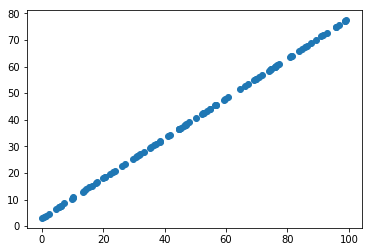

In [22]:
# 极端情况  可以看到当2个特征存在较强的线性关系时 我们的pca 会找到这个轴
# random value from 0 - 100
X2 = np.empty((100,2))
X2[:, 0] = np.random.uniform(0., 100., size=100)
X2[:, 1] = 0.75 * X2[:, 0] + 3. 
plt.scatter(X2[:, 0], X2[:, 1])

In [23]:
X2_mean = demean(X2)

In [24]:
w2 = gradient_ascent(df_math, X2_mean, initial_w, eta)
w2

array([0.8000002 , 0.59999973])

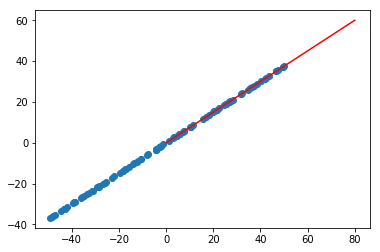

In [26]:
plt.scatter(X2_mean[:, 0], X2_mean[:, 1])
plt.plot([0, w2[0] * 100], [0, w2[1] * 100], color="r")

In [ ]:
## 如何求出其他多个主成分呢?